<a href="https://colab.research.google.com/github/kungfumas/aplikasi-deep-learning/blob/master/pycaretregresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 636 kB 58.2 MB/s 
     |████████████████████████████████| 268 kB 55.1 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 42.9 MB/s 
     |████████████████████████████████| 2.0 MB 45.9 MB/s 
     |████████████████████████████████| 88 kB 7.0 MB/s 
     |████████████████████████████████| 1.7 MB 52.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 20.7 MB/s 
     |████████████████████████████████| 167 kB 16.0 MB/s 
     |████████████████████████████████| 6.8 MB 45.5 MB/s 
     |████████████████████████████████| 1

In [2]:
pip install markupsafe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import jinja2
from pycaret.regression import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
dataset=pd.read_csv('https://raw.githubusercontent.com/kungfumas/aplikasi-deep-learning/master/50_Startups.csv')
dataset.head

<bound method NDFrame.head of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  

In [7]:
import pandas_profiling as pp 

In [8]:
profile = pp.ProfileReport(dataset) 
profile.to_file("output.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd
 
# Mengimpor dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/kungfumas/aplikasi-deep-learning/master/50_Startups.csv')
X = dataset.iloc[:, :-1].values
Tampilkan_X = pd.DataFrame(X) #visualisasi X
y = dataset.iloc[:, 4].values
 
# Encode data kategori
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
        [('encoder', OneHotEncoder(), [3])],
        remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=np.float)
 
# Menghindari jebakan dummy variabel
X = X[:, 1:]
 
# Membagi data menjadi the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 

In [103]:
y_train.shape

(40,)

In [104]:
X_train.shape

(40, 5)

In [120]:
train_data1=pd.DataFrame(X_train,columns=['X1','Location','R&D Spend','Administration','Marketing Spend'])

In [121]:
train_data2=train_data1.drop(['X1'],axis=1)

In [105]:
ytrain_data=pd.DataFrame(y_train,columns=['Profit'])

In [122]:
train_data=pd.concat([train_data2,ytrain_data],axis=1)

In [ ]:
train_data.head

In [137]:
test_data1=pd.DataFrame(X_test,columns=['X1','Location','R&D Spend','Administration','Marketing Spend'])

In [138]:
test_data2=test_data1.drop(['X1'],axis=1)

In [139]:
ytest_data=pd.DataFrame(y_test,columns=['Profit'])

In [140]:
test_data=pd.concat([test_data2,ytest_data],axis=1)

In [141]:
test_data

,Location,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,66051.52,182645.56,118148.20,103282.38
1,0.0,100671.96,91790.61,249744.55,144259.40
2,0.0,101913.08,110594.11,229160.95,146121.95
3,0.0,27892.92,84710.77,164470.71,77798.83
4,0.0,153441.51,101145.55,407934.54,191050.39
5,1.0,72107.60,127864.55,353183.81,105008.31
6,1.0,20229.59,65947.93,185265.10,81229.06
7,1.0,61136.38,152701.92,88218.23,97483.56
8,0.0,73994.56,122782.75,303319.26,110352.25
9,0.0,142107.34,91391.77,366168.42,166187.94


In [124]:
s=setup(data=train_data,target='Profit',session_id=123,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Profit
2,Original Data,"(40, 5)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(27, 4)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Profit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [125]:
compare_models(sort='MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,5266.5166,4.506410e+07,6178.2387,0.8624,0.0634,0.0527,0.007
br,Bayesian Ridge,5718.6998,5.133041e+07,6755.8416,0.8472,0.0729,0.0597,0.009
en,Elastic Net,5865.2478,5.329120e+07,6895.4711,0.8352,0.0739,0.0607,0.009
ridge,Ridge Regression,6150.1108,5.868130e+07,7238.1438,0.8085,0.0766,0.0632,0.008
llar,Lasso Least Angle Regression,6244.2055,6.059846e+07,7350.7465,0.7987,0.0775,0.0640,0.009
lasso,Lasso Regression,6248.1495,6.068894e+07,7356.7450,0.7983,0.0776,0.0640,0.010
lr,Linear Regression,6249.5419,6.072034e+07,7358.6011,0.7982,0.0776,0.0640,0.009
lar,Least Angle Regression,6249.5436,6.072035e+07,7358.6024,0.7982,0.0776,0.0640,0.009
et,Extra Trees Regressor,6878.4817,1.093032e+08,8620.5344,0.7304,0.0919,0.0781,0.699
huber,Huber Regressor,9745.0982,1.333796e+08,10698.0358,0.5604,0.1222,0.1057,0.028


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)
INFO:logs:compare_models() succesfully completed......................................


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [126]:
en=create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7789.3726,7.390341e+07,8596.7090,0.9306,0.1361,0.1043
1,6963.2866,5.674634e+07,7533.0166,0.5855,0.0634,0.0613
2,6947.8281,6.285675e+07,7928.2251,0.9329,0.0678,0.0613
3,5269.4531,5.750833e+07,7583.4248,0.9059,0.1340,0.0957
4,4932.8540,3.093013e+07,5561.4858,0.8706,0.0533,0.0514
5,7474.8281,7.852287e+07,8861.3135,0.4022,0.1028,0.0778
6,6318.5547,8.092411e+07,8995.7832,0.8662,0.0520,0.0371
7,1387.3789,2.453684e+06,1566.4241,0.9885,0.0153,0.0141
8,2932.9414,1.301446e+07,3607.5559,0.9897,0.0428,0.0338


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [127]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10591.3125,1.262423e+08,11235.7579,0.8815,0.1715,0.1364
1,5388.0365,4.371799e+07,6611.9577,0.6806,0.0536,0.0454
2,7292.4219,5.818787e+07,7628.0973,0.9379,0.0668,0.0659
3,9453.8438,1.527720e+08,12360.0973,0.7500,0.2027,0.1657
4,14185.0521,2.318954e+08,15228.1125,0.0296,0.2265,0.1697
5,9039.7240,9.208882e+07,9596.2918,0.2989,0.1026,0.0893
6,27803.7474,1.302320e+09,36087.6668,-1.1540,0.2411,0.1632
7,6917.7695,6.509396e+07,8068.0827,0.6939,0.0736,0.0692
8,23231.6914,5.953411e+08,24399.6130,0.5303,0.1808,0.1982


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


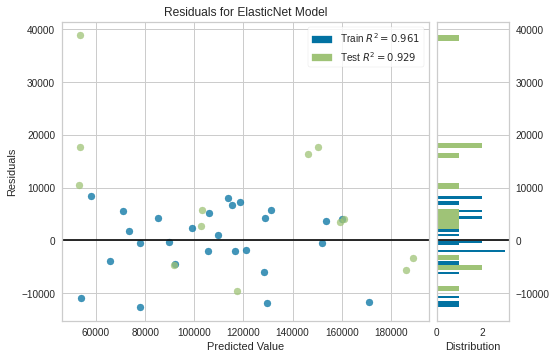

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [128]:
plot_model(en)

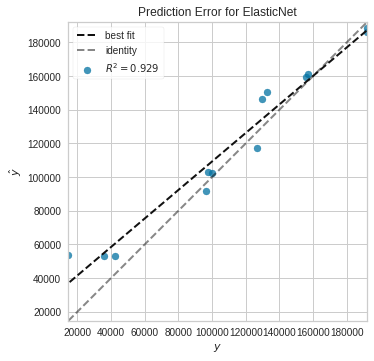

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [129]:
plot_model(en, plot = 'error')

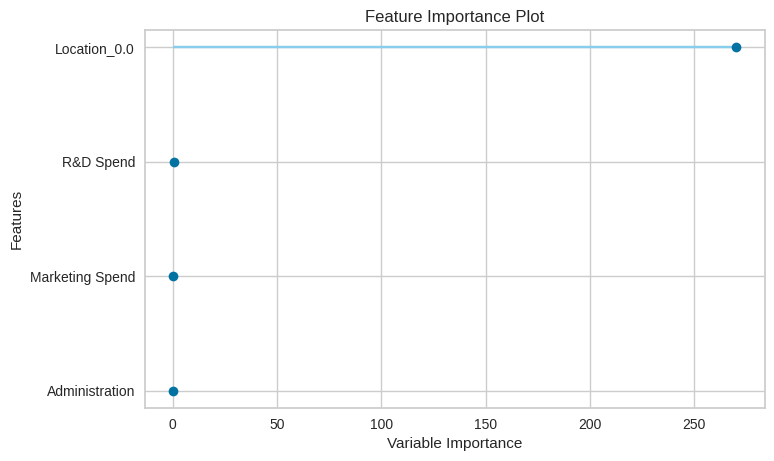

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [130]:
plot_model(en, plot='feature')

In [131]:
evaluate_model(en)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [132]:
tuned_en = tune_model(en)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7749.4272,7.298428e+07,8543.0840,0.9315,0.1348,0.1035
1,6497.9321,4.943573e+07,7031.0547,0.6389,0.0594,0.0572
2,7004.5376,6.279891e+07,7924.5767,0.9330,0.0686,0.0622
3,5278.1929,5.759112e+07,7588.8818,0.9058,0.1340,0.0958
4,4857.9243,2.926330e+07,5409.5566,0.8775,0.0522,0.0508
5,7309.2212,7.624644e+07,8731.9209,0.4195,0.1014,0.0762
6,6191.7632,7.843532e+07,8856.3721,0.8703,0.0512,0.0363
7,1286.4102,2.138674e+06,1462.4208,0.9899,0.0142,0.0130
8,3003.7500,1.325646e+07,3640.9426,0.9895,0.0431,0.0343


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [133]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10591.3125,1.262423e+08,11235.7579,0.8815,0.1715,0.1364
1,5388.0365,4.371799e+07,6611.9577,0.6806,0.0536,0.0454
2,7292.4219,5.818787e+07,7628.0973,0.9379,0.0668,0.0659
3,9453.8438,1.527720e+08,12360.0973,0.7500,0.2027,0.1657
4,14185.0521,2.318954e+08,15228.1125,0.0296,0.2265,0.1697
5,9039.7240,9.208882e+07,9596.2918,0.2989,0.1026,0.0893
6,27803.7474,1.302320e+09,36087.6668,-1.1540,0.2411,0.1632
7,6917.7695,6.509396e+07,8068.0827,0.6939,0.0736,0.0692
8,23231.6914,5.953411e+08,24399.6130,0.5303,0.1808,0.1982


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [135]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13935.3385,1.953573e+08,13977.0258,0.8167,0.1632,0.1734
1,11683.0521,2.363431e+08,15373.4558,-0.7265,0.1161,0.0994
2,12619.6068,2.684318e+08,16383.8869,0.7134,0.1193,0.1021
3,13885.6432,3.216856e+08,17935.5945,0.4736,0.2765,0.2407
4,8917.2995,1.304357e+08,11420.8433,0.4542,0.1336,0.0998
5,6076.1458,5.172913e+07,7192.2965,0.6062,0.0655,0.0557
6,20318.2474,6.350972e+08,25201.1346,-0.0504,0.1616,0.1246
7,14582.2188,2.134303e+08,14609.2539,-0.0037,0.1599,0.1626
8,8458.0273,7.522077e+07,8672.9910,0.9407,0.1018,0.0855


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 7
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


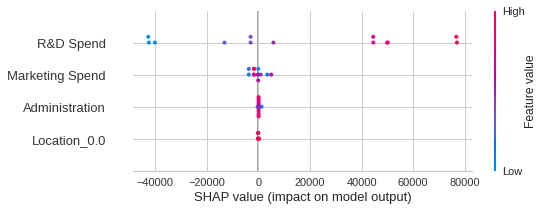

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [136]:
interpret_model(dt)

In [142]:
predict_model(en,data=test_data.drop(['Profit'],axis=1))

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Location,R&D Spend,Administration,Marketing Spend,Label
0,0.0,66051.52,182645.56,118148.20,106525.960938
1,0.0,100671.96,91790.61,249744.55,134852.406250
2,0.0,101913.08,110594.11,229160.95,135654.281250
3,0.0,27892.92,84710.77,164470.71,76754.890625
4,0.0,153441.51,101145.55,407934.54,178257.906250
5,1.0,72107.60,127864.55,353183.81,114314.625000
6,1.0,20229.59,65947.93,185265.10,71201.218750
7,1.0,61136.38,152701.92,88218.23,102400.843750
8,0.0,73994.56,122782.75,303319.26,114842.546875
9,0.0,142107.34,91391.77,366168.42,168792.250000


In [143]:
final_dt = finalize_model(dt)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, spli

In [144]:
save_model(final_dt,'Final Decision Tree Model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), model_name=Final Decision Tree Model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Profit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='n

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Profit',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
     